# Analisis Prediktif dan Segmentasi Data Kanker Payudara Menggunakan Logistic Regression dan K-Means Clustering

**Tugas Besar Penambangan Data**

Kelas    : SI-47-10
Kelompok : 12

## Informasi Dataset

Dataset ini berasal dari University of Wisconsin Hospitals, Madison. Dataset ini digunakan untuk mendiagnosis kanker payudara berdasarkan fitur-fitur yang diekstraksi dari gambar digital hasil aspirasi jarum halus (Fine Needle Aspiration - FNA) dari massa payudara. Fitur-fitur tersebut menggambarkan karakteristik inti sel yang terdapat dalam gambar tersebut.

### Karakteristik Dataset
- Jumlah Instansi (Baris): 569

- Jumlah Fitur (Kolom): 30 fitur numerik

- Tipe Fitur: Numerik kontinu (real-valued)

- Nilai yang Hilang: Tidak ada

- Target (Label): Diagnosis kanker payudara:

- M = Malignant (ganas)

- B = Benign (jinak)

### Daftar Fitur
1. Radius: Rata-rata jarak dari pusat ke titik-titik pada perimeter.

2. Texture: Standar deviasi nilai skala abu-abu.

3. Perimeter: Panjang perimeter inti sel.

4. Area: Luas inti sel.

5. Smoothness: Variasi lokal dalam panjang radius.

6. Compactness: (Perimeter² / Area) - 1.0.

7. Concavity: Tingkat keparahan bagian cekung pada kontur.

8. Concave Points: Jumlah bagian cekung pada kontur.

9. Symmetry: Tingkat simetri inti sel.

10. Fractal Dimension: "Pendekatan garis pantai" - 1, mengukur kompleksitas kontur.

Dalam setiap obeservasi satu pasien FNA, dihitung 3 ukuran dari setiap fitur-fitur utama sehingga terdapat total 10 x 3 jumlah fitur.
Berikut merupakan penjelasan pengukuran yang diambil dari setiap fitur:

- **mean**: merupakan rata-rata pengukuran dari setiap sel nuclei pada gambar pasien (contoh: rata-rata radius setiap sel sampel FNA)
- **std**: Merupakan persebaran data terhadap nilai rata-rata setiap ukuran (contoh: standard deviasi radius sel sampel FNA)
- **worst**: Merupakan ukuran terburuk dalam gambar sel pasien yang diobservasi biasanya digambarkan dengan nilai paling besar (contoh: radius terburuk dari seluruh sel sampel FNA)

## Business Understanding

## Data Understanding

Sebelum melakukan analisa lebih dalam, tahap pertama yang harus dilakukan adalah melakukan eksplorasi terhadap dataset yang akan digunakan.

Import dataset dilakukan menggunakan library bawaan dari sumber dataset UCI Machine Learning Repository

In [75]:
## Import dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

### Memeriksa informasi dataset

Bagian ini dilakukan untuk memeriksa struktur dataset dan tipe data dalamd dataset.

In [76]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Penamaan setiap fitur masing menggunakan anotasi angka yang kurang bermakna seperti radius1 (mean), radius2 (std), radius3 (worst). Kita akan menangani penamaan nama kolom pada tahap lanjutan.

In [77]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [78]:
print(f"Shape dataframe fitur: {X.shape}")
print(f"Shape dataframe target: {y.shape}")

Shape dataframe fitur: (569, 30)
Shape dataframe target: (569, 1)


Setelah melakukan import, kita dapat melihat bahwa fitur dataset terdiri dari 569 row (instance) data dan 30 fitur beserta jumlah row target yang sama yaitu 569.

In [79]:
# Melihat informasi feature
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [80]:
# Melihat informasi target
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


Berdasarkan informasi tersebut, kita dapat melihat bahwa seluruh fitur dataset memiliki tipe data numeric yaitu float. Ini sesuai dengan deskripsi resmi dari halaman dataset yaitu data merupakan hasil pengukuran sel yang didapatkan menggunakan teknik *Fine Needle Aspiration*. Selain fitur numeric, target atau label dataset memiliki tipe data object yang berisikan label klasifikasi jenis tumor M (ganas) dan B (jinak)

### Memeriksa duplikasi data

Setelah memeriksa tipe data, selanjutnya kita akan melakukan tahap pemeriksaan duplikasi data. Pengecekan duplikasi data merupakan tahapan yang penting karena data yang duplikat dapat menghasilkan bias dan merubah distribusi data sehingga menghasilkan hasil analisis yang kurang akurat

In [81]:
# Memeriksa duplikasi data pada fitur

X.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset yang digunakan

### Memeriksa null value
Penanganan nilai hilang merupakan salah satu tahapan yang paling penting. Nilai hilang pada dataset dapat mempengaruhi hasil prediksi dan analisis secara signifikan karena beberapa hal berikut: 
- Bias pada dataset
- Mempengaruhi algoritma machine learning
- Kualitas data yang buruk menghasilkan hasil prediksi yang buruk

Berdasarkan informasi resmi dari halaman dataset tidak terdapat nilai hilang. Tapi tahapan ini penting dilakukan untuk memastikan kualitas data yang akan digunakan

In [82]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

(None, None)

Kita dapat melihat bahwa seluruh fitur memiliki count row data yang konsisten sebanyak 569 row.

In [83]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [84]:
y.isnull().sum()

Diagnosis    0
dtype: int64

Tidak terdapat nilai hilang pada dataset.

### Memeriksa ukuran statistik seluruh fitur dataset
Bagian ini dilakukan untuk melihat ukuran statistik seperti nilai pusat dan sebaran masing masing fitur

In [85]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Selanjutnya kita akan memeriksa distribusi masing-masing fitur

In [86]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

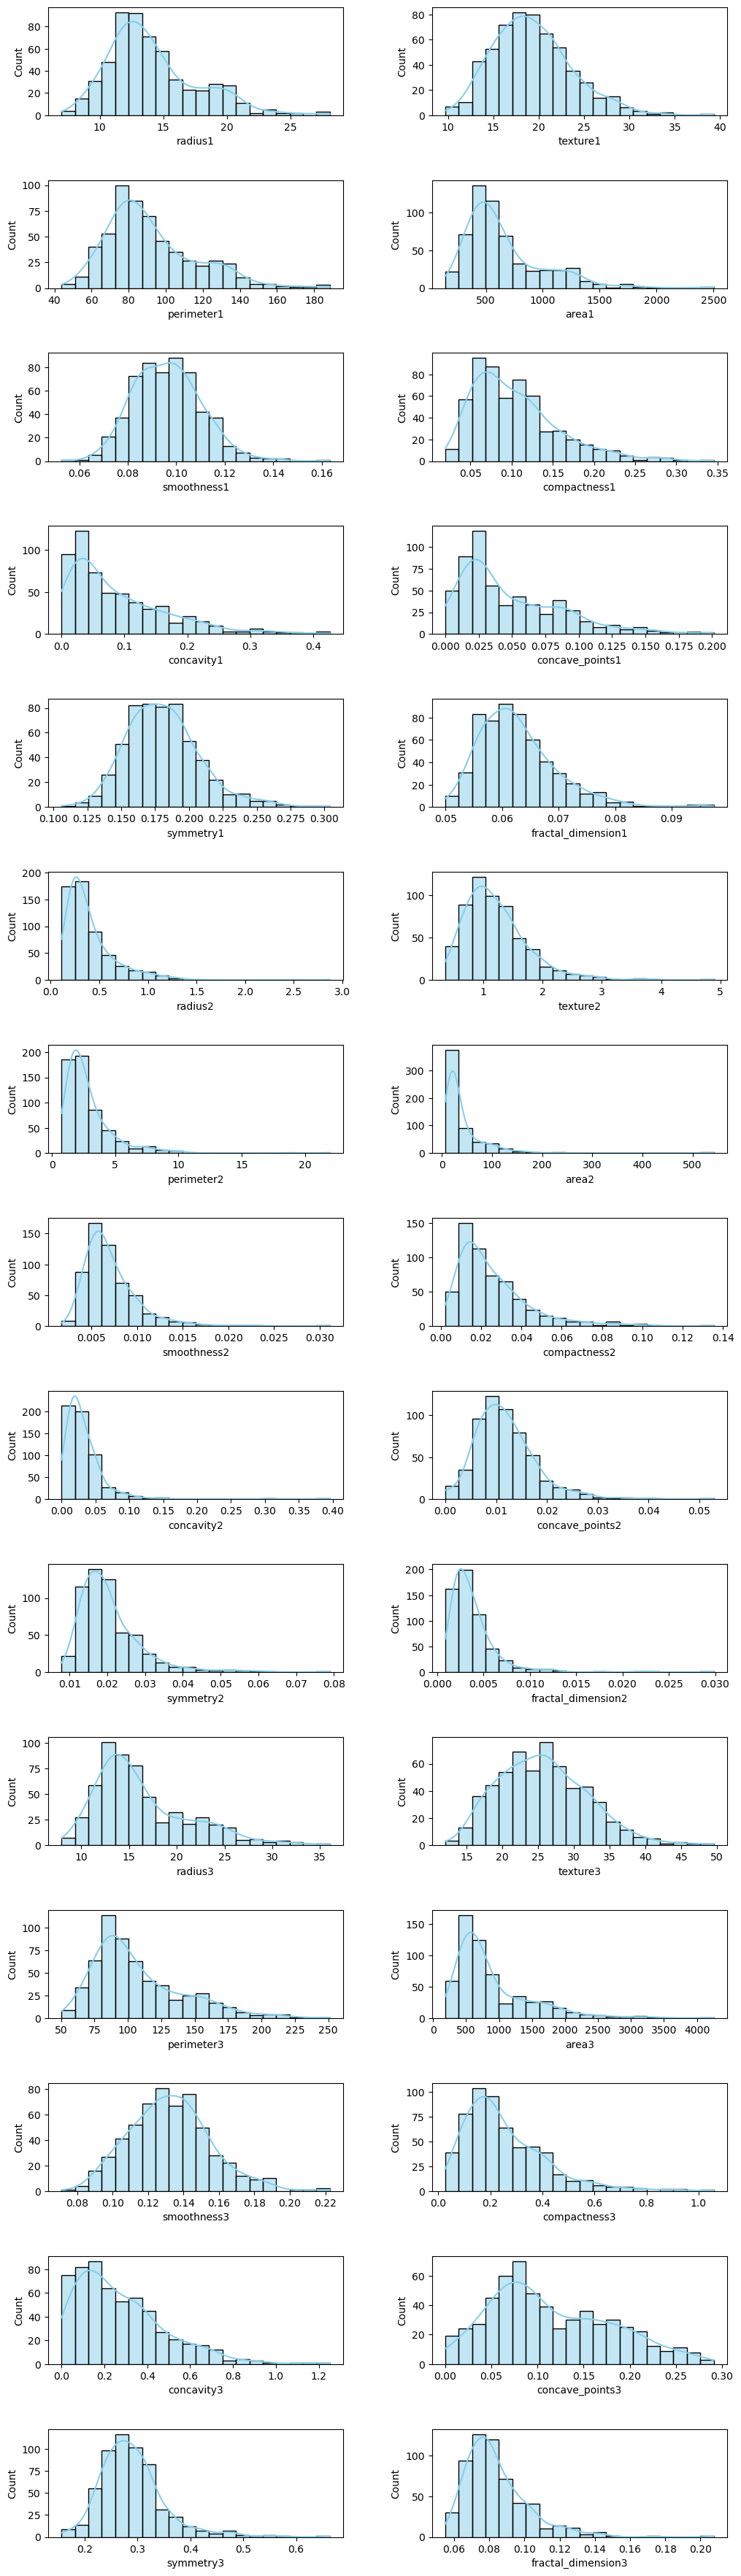

In [91]:
columns = X.columns
n_bins = 20

fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel() 

for i, column in enumerate(columns):
    sns.histplot(X[column], bins=n_bins, ax=axs[i], color='skyblue', kde=True)
    
plt.show()

### Pemeriksaan Outlier
Kita akan melakukan pemeriksaan outlier dengan visualisasi boxplot untuk setiap fitur dalam dataset.

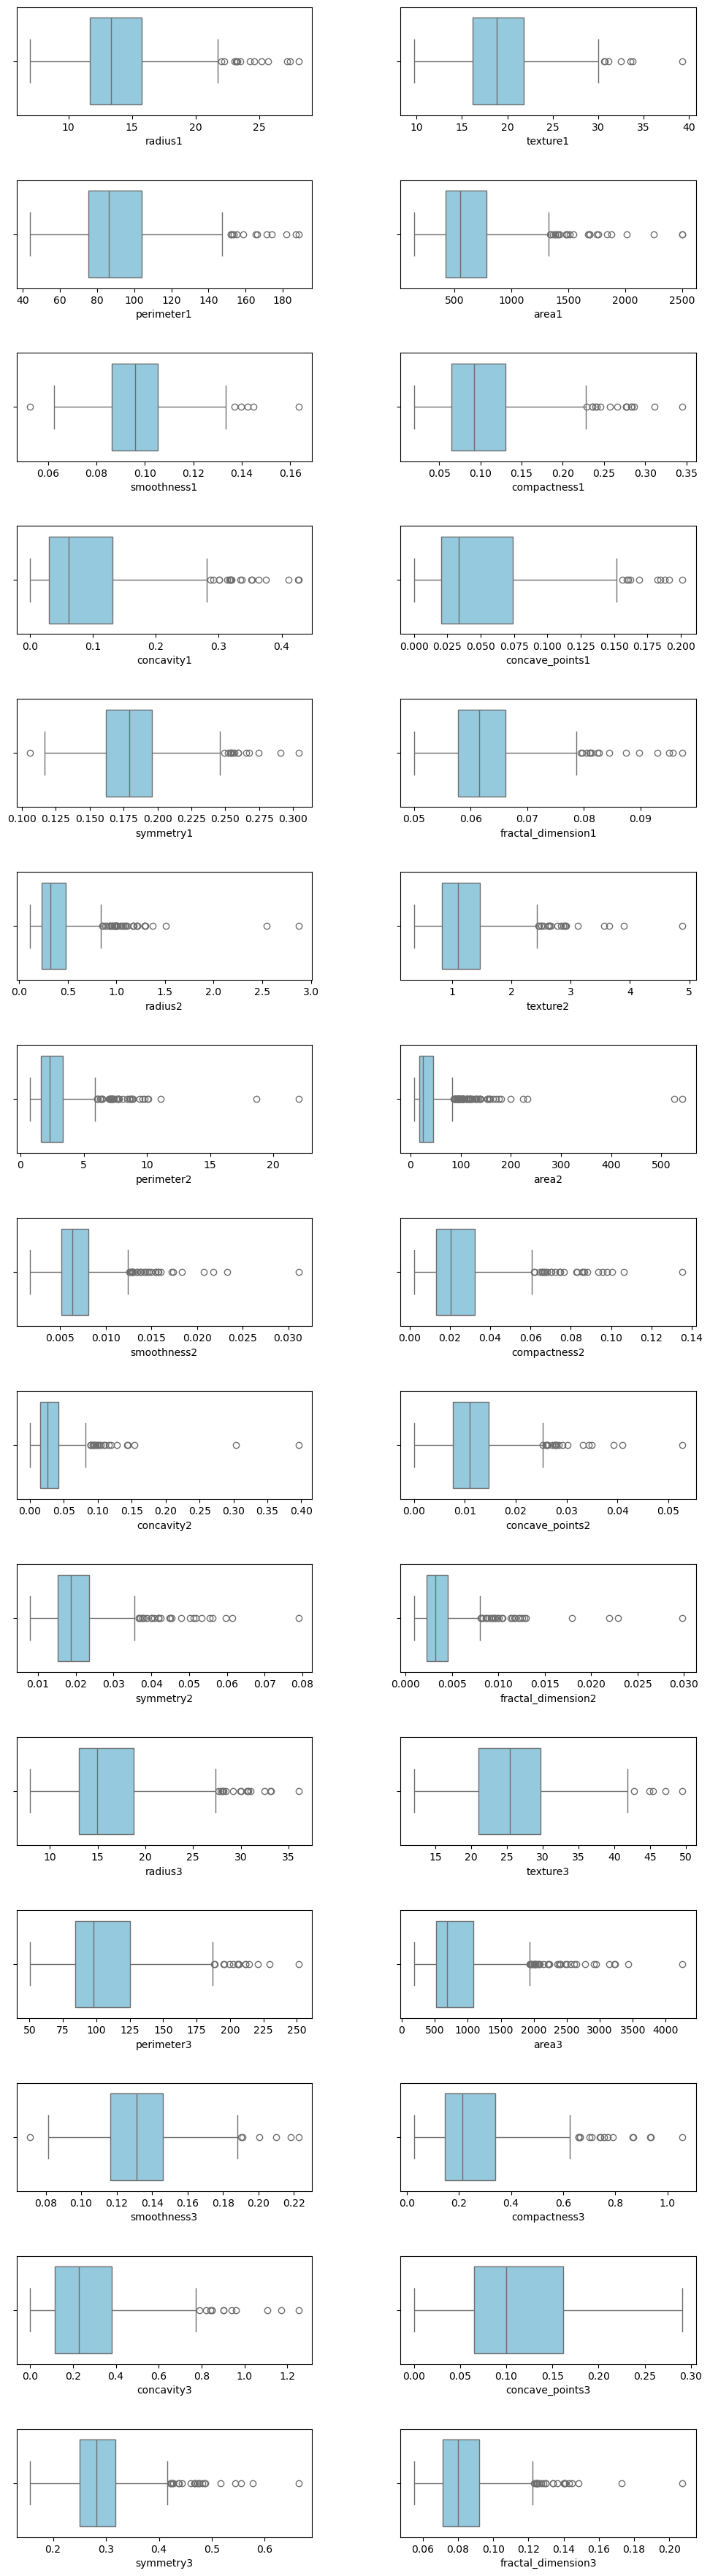

In [93]:
fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel()

for i, column in enumerate(columns):
    sns.boxplot(x=X[column], ax=axs[i], color='skyblue')
    
plt.show()

Berdasarkan hasil visualisasi boxplot, kita dapat melihat masih terdapat outlier yaitu data yang terdapat di luar *whiskers* dari boxplot.

In [94]:
outlier_summary = {}

for column in columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
    feature_mean = X[column].mean()
    outlier_diff = abs(outliers[column] - feature_mean)

    outlier_summary[column] = {
        'feature_mean': feature_mean,
        'num_outliers': outliers.shape[0],
        'outlier_values': outliers[column].values,
        'difference_from_mean': outlier_diff.values
    }


for column, info in outlier_summary.items():
    print(f"{column}\n\nMean: {info['feature_mean']:.2f}")
    print(f"Jumlah outlier: {info['num_outliers']}")
    if info['num_outliers'] > 0:
        print(f"Outlier values: {info['outlier_values']}")
        print(f"Selisih dari mean: {info['difference_from_mean']}")
    print("=" * 50 + '\n')

radius1

Mean: 14.13
Jumlah outlier: 14
Outlier values: [25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]
Selisih dari mean: [11.09270826  8.14270826 10.12270826  9.14270826 13.09270826  9.16270826
 13.98270826  9.08270826  9.38270826 11.60270826  7.88270826 13.29270826
  8.96270826 10.50270826]

texture1

Mean: 19.29
Jumlah outlier: 7
Outlier values: [32.47 33.81 39.28 33.56 31.12 30.72 30.62]
Selisih dari mean: [13.18035149 14.52035149 19.99035149 14.27035149 11.83035149 11.43035149
 11.33035149]

perimeter1

Mean: 91.97
Jumlah outlier: 13
Outlier values: [171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]
Selisih dari mean: [79.53096661 60.83096661 74.23096661 60.13096661 90.13096661 66.93096661
 96.53096661 61.53096661 63.13096661 82.23096661 94.93096661 60.13096661
 73.53096661]

area1

Mean: 654.89
Jumlah outlier: 25
Outlier values: [1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 201

Berdasarkan hasil analisis tersebut, terdapat beberapa fitur yang memiliki outlier cukup banyak dan cukup jauh nilainya dari nilai mean fitur. Kita juga dapat melihat bahwa fitur yang memiliki nilai outlier yang cukup banyak dan ekstrem memiliki distrubusi data right-skewed. Karena kita akan menggunakan algoritma berbasis jarak euclidean yaitu K-Means, maka kita akan menggunakan Robust Scaler untuk mengurangi efek outlier.

Robust Scaler melakukan scaling menggunakan **median** dan **interquartile range (IQR)** untuk mengurangi pengaruh outlier.

$$
x_{\text{scaled}} = \frac{x - \text{median}(X)}{\text{IQR}(X)}
$$

### Melihat korelasi data

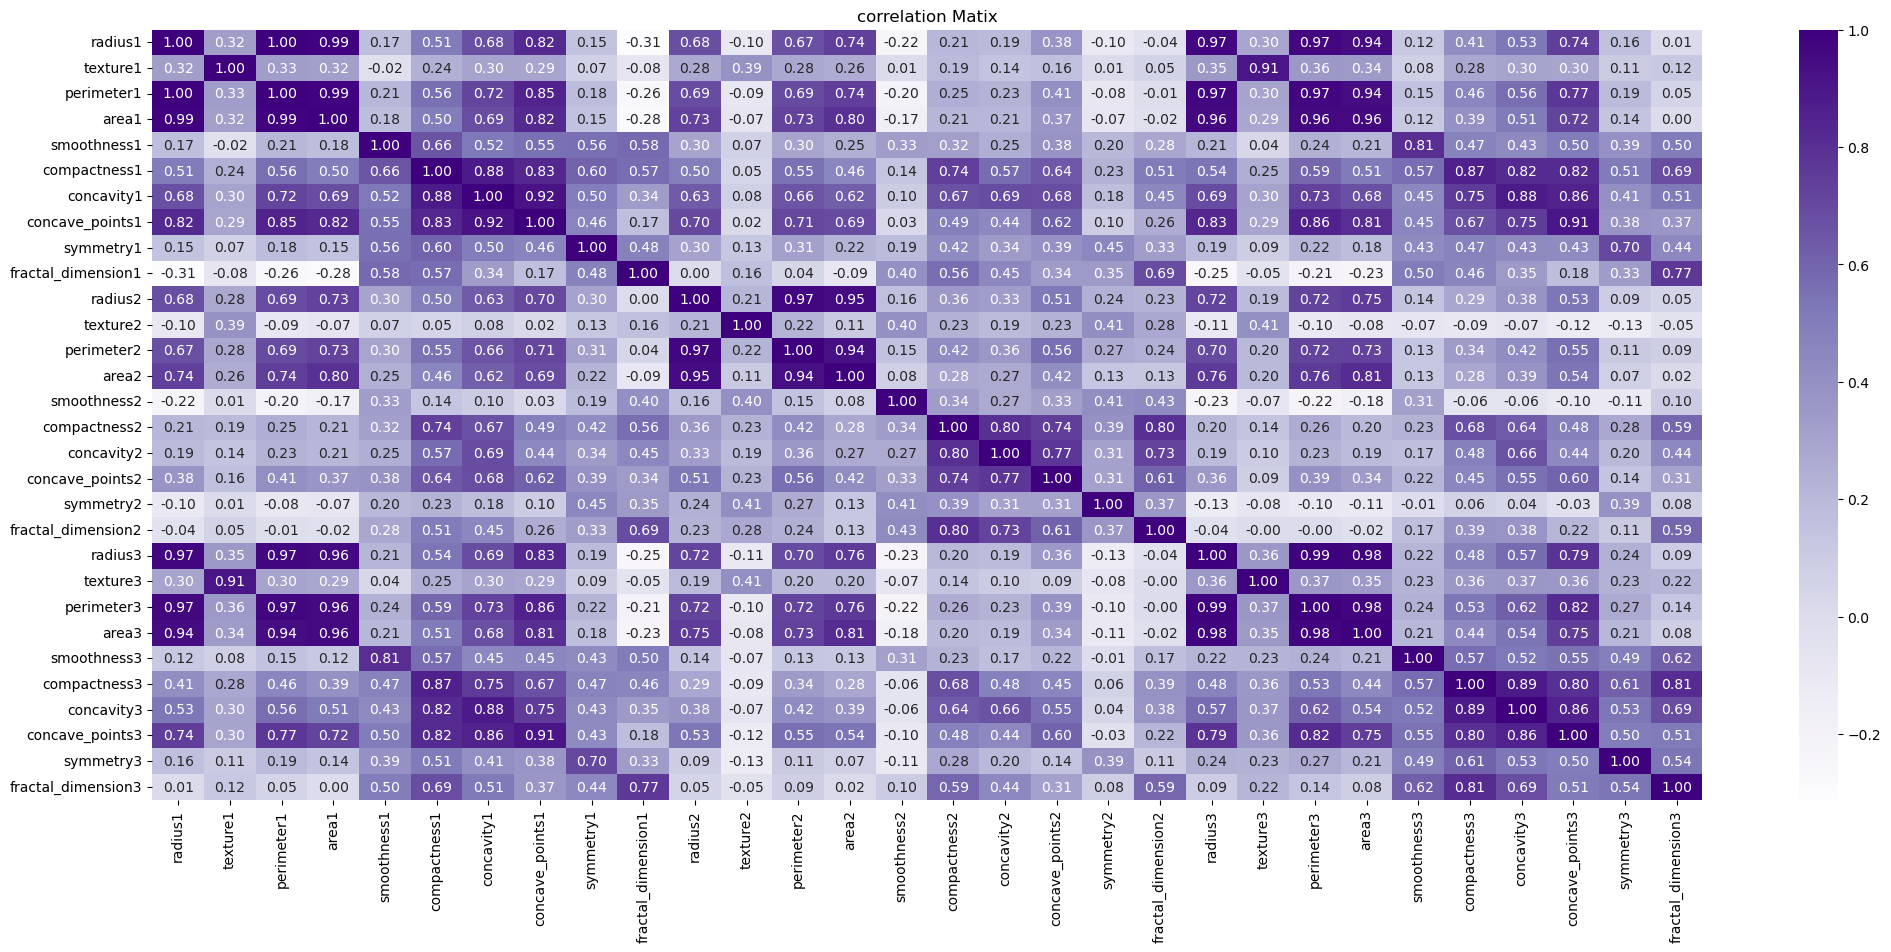

In [95]:
plt.figure(figsize=(25, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

## Data Preprocessing

Setelah memahami dataset yang akan digunakan, selanjutnya kita akan melakukan preprocessing terhadap dataset sampai dengan pemisahan dataset menjadi train dan test set.

### Mapping target
Seperti yang kita lihat pada tahap sebelumnya, dataset masih memiliki target dengan tanda 'M' untuk malignant dan 'B' untuk Benign. Pada tahap ini, dilakukan mapping value menjadi numeric untuk mempermudah pelatihan model

In [96]:
y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

C:\Users\ANAKING FAIQAL LUFI\AppData\Local\Temp\ipykernel_2700\2042718244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})


In [97]:
y.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


In [98]:
y['Diagnosis'].unique()

array([1, 0], dtype=int64)

Sekarang seluruh nilai pada target sudah bertipe data numeric sehingga target sudah siap untuk digunakan

### Rename fitur
Rename dilakukan agar target lebih deskriptif. Untuk fitur yang mengandung 

- 1 = mean
- 2 = std
- 3 = worst

In [99]:
X.columns = [column.replace('1', '_mean').replace('2', '_std').replace('3', '_worst') for column in X.columns]

columns = X.columns
columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std', 'texture_std', 'perimeter_std', 'area_std',
       'smoothness_std', 'compactness_std', 'concavity_std',
       'concave_points_std', 'symmetry_std', 'fractal_dimension_std',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Perubahan nama column sudah dilakukan. Sekarang setiap fitur menjadi lebih deskriptif

### Split dataset

Sekarang kita sudah memiliki dataframe feature dan target, sebelum melakukan modeling tahapan selanjutnya adalah split dataset. Kita akan menggunakan 80/20 split train test menggunakan library sklearn

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

### Scaling Fitur

Setelah dataset displit menjadi data train dan test, selanjutnya kita akan menerapkan scaling terhadap data yang kita miliki

In [101]:
from sklearn.preprocessing import RobustScaler

In [102]:
scaler = RobustScaler()

# Robust Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mari kita lihat data yang sudah dilakukan transformasi scaling

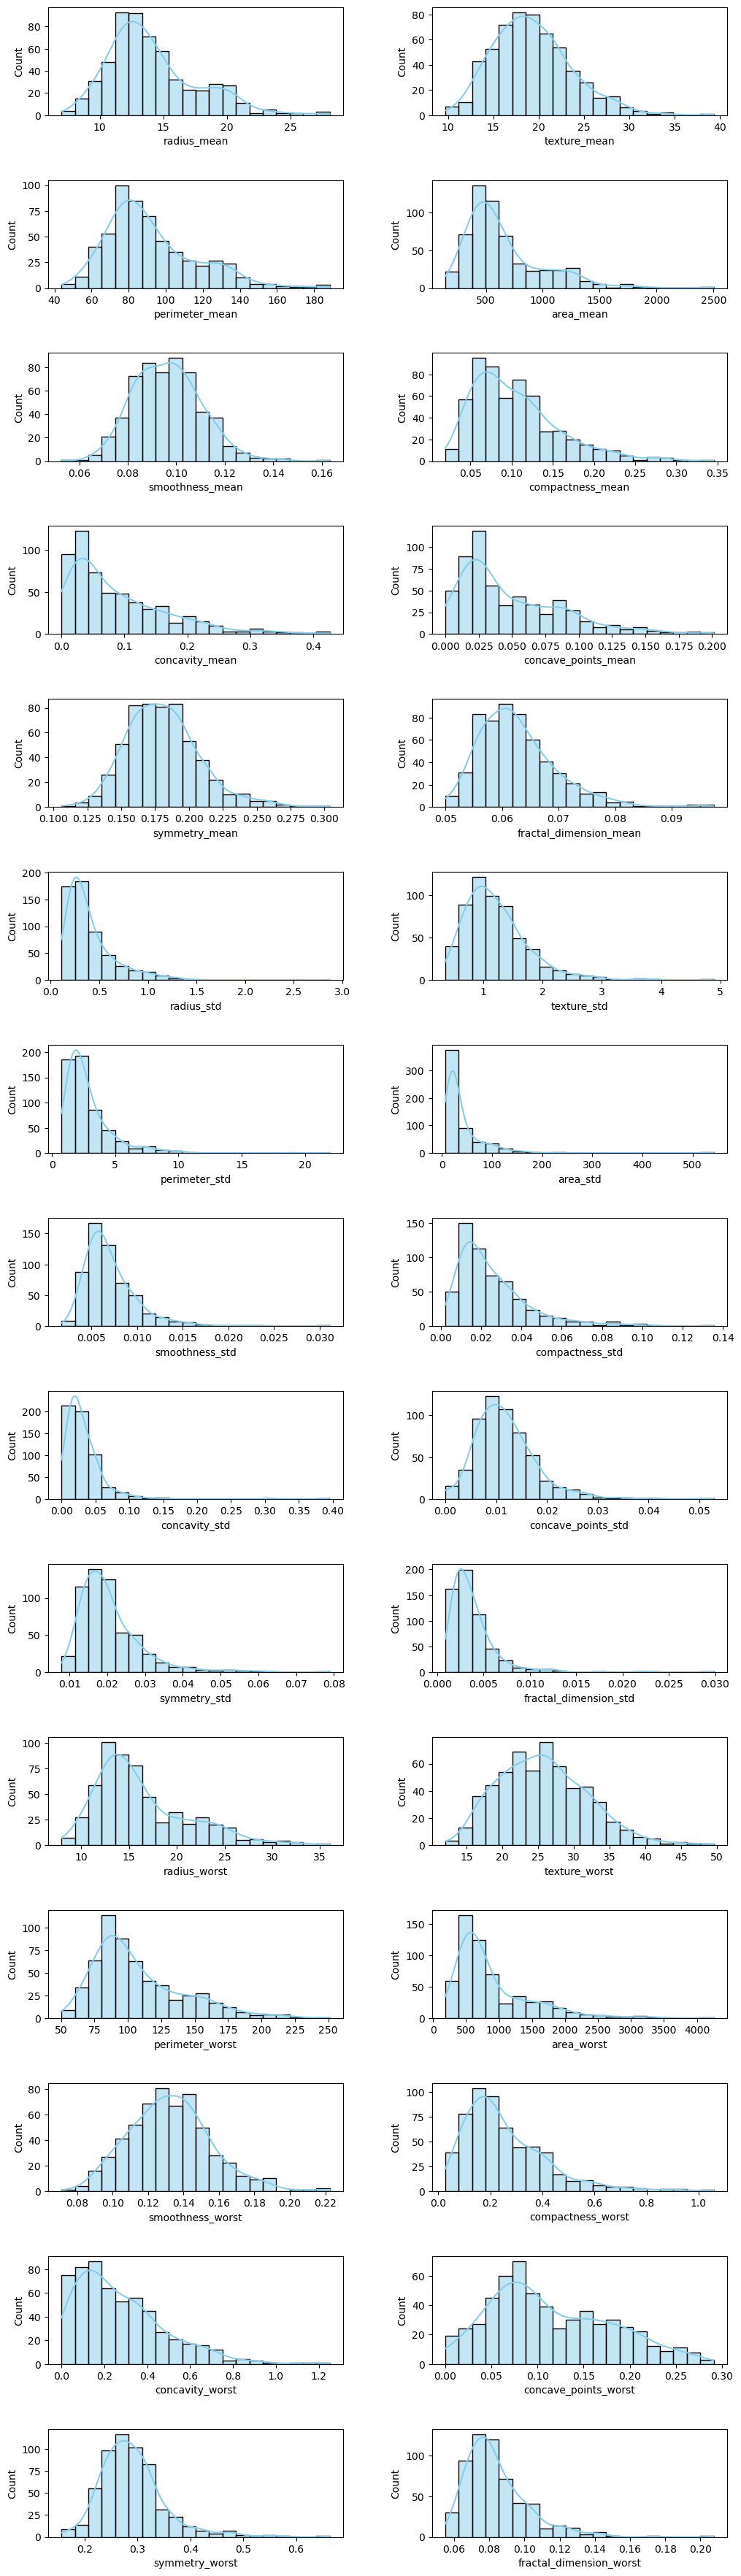

In [103]:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i+1}' for i in range(X_train.shape[1])]

X_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

columns = X_scaled_df.columns
n_bins = 20

fig, axs = plt.subplots(15, 2, figsize=(12, 45), facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace=0.3, hspace=0.6)

axs = axs.ravel() 

for i, column in enumerate(columns):
    sns.histplot(X[column], bins=n_bins, ax=axs[i], color='skyblue', kde=True)
    
plt.show()

## Modeling - Classification

Pada bagian ini akan dilakukan penerapan teknik modeling machine learning menggunakan algoritma Logistic Regression terhadap data yang sudah melalui tahapan preprocessing

In [108]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(max_iter=1000, solver='liblinear')

Model sudah dilatih, kita akan membuat prediksi dan lihat performa model

In [109]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [110]:
# Import metrics untuk prediksi
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Evaluasi Model Classification

Melihat skor akurasi

In [112]:
print(f"Test Accuracy  (RobustScaler): {accuracy_score(y_test, y_pred_test)*100:.4f}%")

Test Accuracy  (RobustScaler): 99.1228%


Melihat confusion matrix

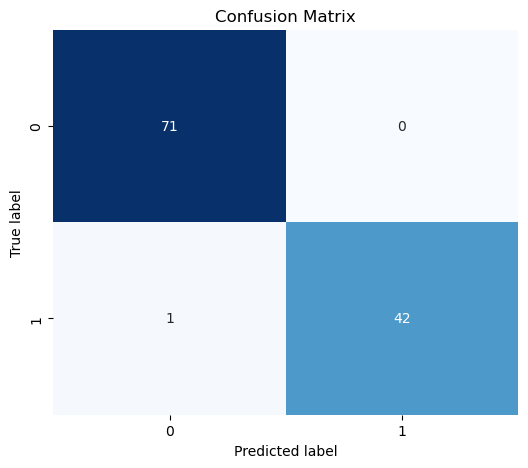

In [138]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan hasil confusion matrix, kita dapat melihat bahwa model sudah mampu mengklasifikasi seluruh data **Benign** dengan benar pada test set dan masih terdapat prediksi false negative (diprediksi benign namun aslinya malignant).

Melihat hasil klasifikasi

In [139]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Selanjutnya kita akan mlakukan evaluasi menggunakan roc auc curve

AUC: 0.9980


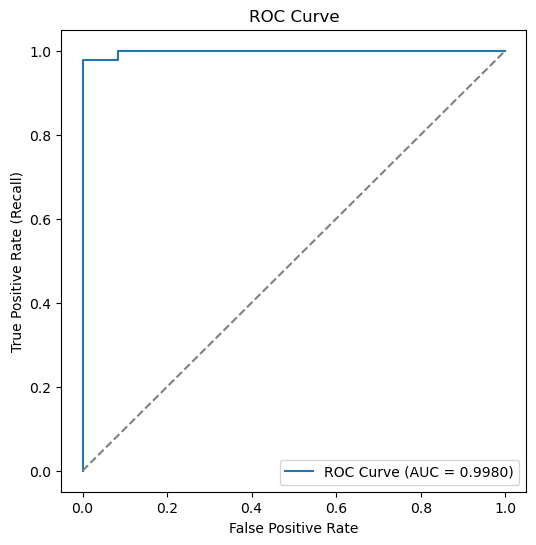

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Hitung AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

### Tuning model

Meskpun model sudah memiliki performa yang cukup baik, pada bagian ini kita akan melakukan tuning model untuk melihat apakah model masih bisa ditingkatkan lagi

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


clf_log = LogisticRegression(solver='liblinear', max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced'] 
}

Lakukan pencarian hyperparameter tuning

In [125]:
grid_search = GridSearchCV(clf_log, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

Lihat hasil paramter terbaik

In [126]:
print("Best params:", grid_search.best_params_)
print(f"Best AUC: {grid_search.best_score_:.4f}")

Best params: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
Best AUC: 0.9946


Ambil best model

In [127]:
best_model = grid_search.best_estimator_

### Membandingkan best model dan model pertama

Pada bagian ini kita akan bandingkan kinerja model pertama dan setelah tuning pada beberapa metrics

Bandingkan skor akurasi

In [133]:
base_model_pred = model.predict(X_test_scaled)
best_model_pred = best_model.predict(X_test_scaled)

print(f"Test Accuracy base model: {accuracy_score(y_test, base_model_pred)*100:.4f}%")
print(f"Test Accuracy best model: {accuracy_score(y_test, best_model_pred)*100:.4f}%")

Test Accuracy base model: 99.1228%
Test Accuracy best model: 99.1228%


Kita dapat melihat bahwa tidak ada perubahan pada skor akurasi. Jika ada mungkin perubahan yang terjadi sangat kecil

Bandingkan roc auc

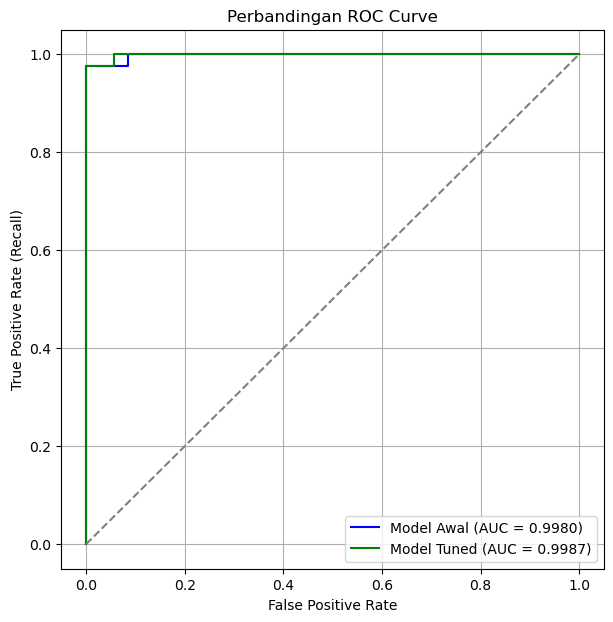

In [135]:
y_pred_prob1 = model.predict_proba(X_test_scaled)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
auc1 = roc_auc_score(y_test, y_pred_prob1)

y_pred_prob2 = best_model.predict_proba(X_test_scaled)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
auc2 = roc_auc_score(y_test, y_pred_prob2)

plt.figure(figsize=(7, 7))
plt.plot(fpr1, tpr1, label=f"Model Awal (AUC = {auc1:.4f})", color='blue')
plt.plot(fpr2, tpr2, label=f"Model Tuned (AUC = {auc2:.4f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Perbandingan ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Teradapat peningkatan pada nilai area under the curve (AUC) mesikpun sangat sedikit. Hyperparameter tuning membuat model lebih baik sedikit dalam memisahkan kelas.

Selanjutnya kita bandingkan confusion matrix base model dan best model

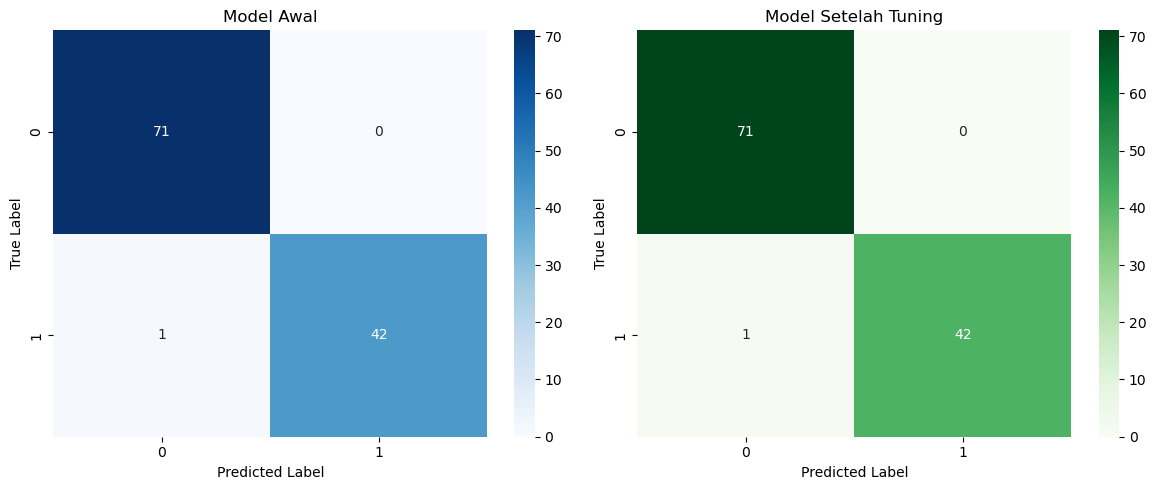

In [137]:
cm1 = confusion_matrix(y_test, base_model_pred)
cm2 = confusion_matrix(y_test, best_model_pred)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Model Awal")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Model Setelah Tuning")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

Tidak ada perbedaan pada hasil prediksi

Bandingkan hasil classification report

In [141]:
print("Model awal")
print(classification_report(y_test, base_model_pred))

print("Model tuned")
print(classification_report(y_test, best_model_pred))

Model awal
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Model tuned
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Tidak ada perbedaan signifikan juga pada hasil classification report.

In [142]:
# Simpan model
import joblib

joblib.dump(best_model, 'clf_model_breast_cancer.pkl')

['clf_model_breast_cancer.pkl']

**Kesimpulan**: Model Logistic Regression sudah cukup baik untuk dilatih pada kasus klasifikasi dataset ini. Setelah dilakukan tuning model, hanya terdapat sedikit peningkatan yaitu pada bagian skor AUC antara model awal dan tuned. Ini menunjukan bahwa model awal sudah cukup capable. Tetapi dengan hyperparameter tuning, model masih dapat mengalami peningkatan performa